In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import sklearn as sk
from sklearn import preprocessing
from sklearn.decomposition import PCA


In [6]:
# Create a directory for figures
import os
if not os.path.exists('Figures'):
    os.makedirs('Figures')

In [93]:
# Set plot formatting
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.size'] = 12
plt.rcParams['text.color'] = 'black'

In [3]:
# Read in the data as a Pandas frame
Femaledf = pd.read_csv('./ANSUR_II_FEMALE_Public.csv', encoding='latin-1')

#print(Femaledf.columns.values)

In [4]:
# Pull out 9 anthropometric meansurements to do PCA
df = Femaledf[["anklecircumference", "chestcircumference", "earlength",
               "functionalleglength", "headlength", "sittingheight",
               "span", "thighcircumference", "weightkg"]]


In [5]:
# Normalise the data
df = (df-np.mean(df, axis=0))/np.std(df, axis=0)
df.to_csv('myfemalemeasurements.csv') 
df.head()

,anklecircumference,chestcircumference,earlength,functionalleglength,headlength,sittingheight,span,thighcircumference,weightkg
0,-0.788532,-0.300659,1.453672,-0.301576,0.158482,-1.622769,-0.160172,0.104872,-0.187418
1,-0.587028,-1.304550,0.164836,1.346582,-1.318567,-0.654419,1.093575,-1.651519,-1.307445
2,1.159344,-0.881223,1.453672,0.291020,2.306918,1.433585,1.431122,-0.701634,-0.132783
3,-0.116851,0.739517,0.680370,0.457688,2.172641,0.556018,0.575198,1.126446,0.950820
4,-0.116851,1.719218,1.453672,-0.097871,-1.184290,-0.987289,0.502867,2.685691,1.897835


In [247]:
# Calculate e'vaues manually
R = np.cov(df)
#print(R)

# Calculate the Eigensystem
la, vv = np.linalg.eigh(R)
print("Eigenvalues",la)
print("Eigenvectors", vv)

Eigenvalues [-2.39440971e-13 -1.93097504e-13 -1.88847404e-13 ...  1.98903271e+02
  2.69833575e+02  3.36079841e+02]
Eigenvectors [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.65115410e-02
   2.03469628e-02 -4.64783891e-03]
 [ 2.21046100e-02  3.11380305e-02  2.57190045e-01 ... -3.16868360e-02
  -1.90868037e-03  4.11871777e-02]
 [ 2.93741405e-01 -2.18164306e-01 -2.86941962e-01 ...  2.75001674e-02
   1.99511618e-02  4.81251886e-02]
 ...
 [-2.40840781e-02  2.36364002e-02 -9.51905340e-03 ...  1.67750578e-05
  -1.23737330e-03 -1.74009555e-02]
 [ 8.98030033e-03  1.20123176e-02  1.20266513e-03 ...  4.27414857e-04
   2.10112835e-02 -2.79984109e-03]
 [-4.83790777e-04 -8.75851431e-03 -2.19072172e-03 ... -5.07220991e-03
  -4.92531828e-03  1.67337279e-02]]


In [9]:
# Fit PCA with scikit learn package
pca = PCA(n_components=9)
reduced_df = pca.fit_transform(df)
print(reduced_df[:,0])

# Set columns and index for plotting an interpreting PCs
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
index = ["anklecircumference", "chestcircumference", "earlength",
               "functionalleglength", "headlength", "sittingheight",
               "span", "thighcircumference", "weightkg"]

# Lets determine the signifant variables in each PC
component_df = pd.DataFrame(np.transpose(pca.components_), columns=columns, index=index)
print(component_df)

print("\n\nVariance Proportion:\n", pca.explained_variance_ratio_)
#print("numpy var: \n", la/sum(la)) # manual calc
print("\ne'values: \n", pca.explained_variance_)

[-0.72825659 -1.49128179  1.50143867 ...  1.43336752 -1.11142186
 -0.65903194]
                          PC1       PC2       PC3       PC4       PC5  \
anklecircumference   0.328203  0.143855  0.092553  0.191681 -0.608911   
chestcircumference   0.353400  0.444276 -0.019952 -0.047740  0.246858   
earlength            0.171594  0.064647  0.832081 -0.408142  0.231207   
functionalleglength  0.372372 -0.387566 -0.121546  0.125015  0.313794   
headlength           0.236536 -0.288914 -0.245115 -0.774438 -0.398442   
sittingheight        0.271329 -0.315615  0.388082  0.414004 -0.371284   
span                 0.331391 -0.506430 -0.103703  0.076135  0.338920   
thighcircumference   0.390311  0.359257 -0.230752  0.010974  0.021702   
weightkg             0.455581  0.242729 -0.095993  0.041224  0.066475   

                          PC6       PC7       PC8       PC9  
anklecircumference   0.614115  0.264938 -0.043518  0.079277  
chestcircumference  -0.342648  0.628130 -0.001993  0.319611  
earl

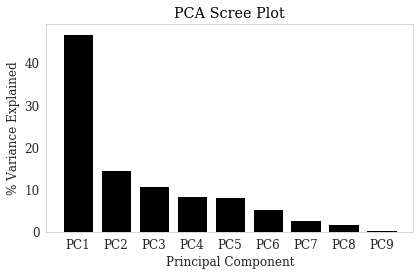

In [340]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']
plt.bar(x= range(1,10), height=percent_variance, tick_label=columns, color='black')
plt.ylabel('% Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.tight_layout()
plt.savefig('Figures/PCAScreePlot.png',format='png')
plt.show()

In [212]:
print(component_df.index)

Index(['anklecircumference', 'chestcircumference', 'earlength',
       'functionalleglength', 'headlength', 'sittingheight', 'span',
       'thighcircumference', 'weightkg'],
      dtype='object')


<function matplotlib.pyplot.show(*args, **kw)>

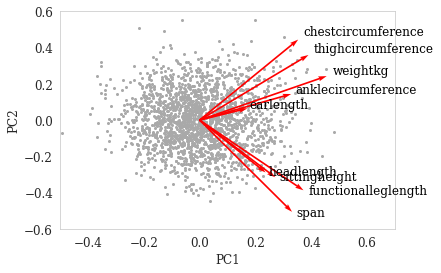

In [313]:
xs = reduced_df[:,0]
ys = reduced_df[:,1]

scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

# Plot PCA
plt.scatter(xs * scalex, ys * scaley ,s=4, color='darkgray')
tail = [0,0]
plt.quiver(*tail, component_df["PC1"], component_df["PC2"],
          scale=1, scale_units='xy', angles='xy',
          width=0.005, color='red')
for i in range(0, len(index)):
    plt.annotate(str(index[i]), xy=(1.05*component_df["PC1"][i], 1.05*component_df["PC2"][i]))    
plt.xlim(-0.5, 0.7)
plt.ylim(-0.6, 0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig('Figures/loadingplot.png',format='png')
plt.show
      

In [20]:
# Perform Factor Analysis with scikit learn package
from factor_analyzer import FactorAnalyzer

In [21]:
# Create factor analysis object and perform FA
fa = FactorAnalyzer(n_factors=9, rotation='varimax')
fa.fit(df)
ev, v = fa.get_eigenvalues()
print(fa)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=9, rotation='varimax',
               rotation_kwargs={}, use_smc=True)


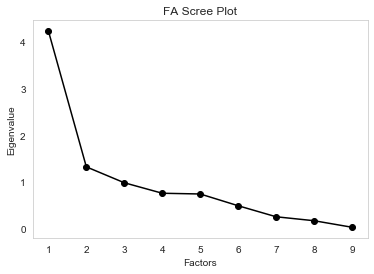

In [22]:
# Create another scree plot
x = range(1,df.shape[1]+1)
y = ev
plt.scatter(x, y, color='black')
plt.ylabel('Eigenvalue')
plt.xlabel('Factors')
plt.title('FA Scree Plot')
plt.plot(x, y, color='black')
plt.savefig('Figures/fascree.png',format='png')

In [23]:
factor_df = pd.DataFrame(fa.loadings_,  index=index)
print(factor_df)

                            0         1         2         3         4  \
anklecircumference   0.422650  0.124936  0.485048  0.153374  0.246257   
chestcircumference   0.823313  0.113807 -0.002039  0.372996 -0.023776   
earlength            0.119788  0.074247  0.137518  0.464214  0.033272   
functionalleglength  0.271338  0.831493  0.205582  0.099107  0.057744   
headlength           0.164110  0.328984  0.121133  0.057247  0.332436   
sittingheight        0.083365  0.323924  0.574413  0.282055  0.045097   
span                 0.124569  0.897464  0.147687  0.113773  0.132756   
thighcircumference   0.899112  0.196397  0.140763  0.010338  0.165425   
weightkg             0.856145  0.342369  0.280031  0.200353  0.151526   

                            5         6         7    8  
anklecircumference  -0.037794  0.232025  0.009357  0.0  
chestcircumference   0.317074 -0.028998  0.007255  0.0  
earlength            0.007477  0.010159  0.000001  0.0  
functionalleglength  0.012423  0.087563  

                         0         1         2         3         4         5  \
Variance          2.535236  1.899842  0.761117  0.523991  0.246147  0.151309   
Proportional Var  0.281693  0.211094  0.084569  0.058221  0.027350  0.016812   
Cumulative Var    0.281693  0.492786  0.577355  0.635576  0.662926  0.679738   

                         6         7         8  
Variance          0.071498  0.025696  0.000000  
Proportional Var  0.007944  0.002855  0.000000  
Cumulative Var    0.687682  0.690537  0.690537  


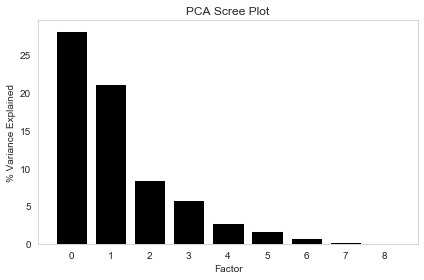

In [26]:
FA_vardf = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
print(FA_vardf)

percent_variance = np.round(FA_vardf.loc['Proportional Var']* 100, decimals =2)
columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
plt.bar(x= range(1,10), height=percent_variance, tick_label=columns, color='black')
plt.ylabel('% Variance Explained')
plt.xlabel('Factor')
plt.title('PCA Scree Plot')
plt.tight_layout()
plt.savefig('Figures/FAScreePlot.png',format='png')
plt.show()

In [52]:
communalities = fa.get_communalities()
factor_df["communalities"] = communalities
#print(factor_df)

In [53]:
fa_reduced = fa.transform(df)
#print(fa_reduced)

<function matplotlib.pyplot.show(*args, **kw)>

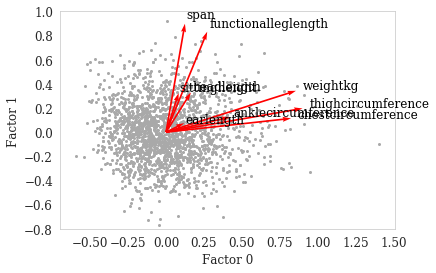

In [343]:
xs = fa_reduced[:,0]
ys = fa_reduced[:,1]

scalex = 2.0/(xs.max() - xs.min())
scaley = 2.0/(ys.max() - ys.min())

# Plot FA
plt.scatter(xs * scalex, ys * scaley ,s=4, color='darkgray')
tail = [0,0]
plt.quiver(*tail, factor_df[0], factor_df[1],
          scale=1, scale_units='xy', angles='xy',
          width=0.005, color='red')
for i in range(0, len(index)):
    plt.annotate(str(index[i]), xy=(1.05*factor_df[0][i], 1.05*factor_df[1][i]))    
#plt.xlim(-0.5, 0.7)
plt.ylim(-0.8, 1)
plt.xlabel("Factor 0")
plt.ylabel("Factor 1")

plt.savefig('Figures/FAloadingplot.png',format='png')
plt.show